# Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("./Data/HousingData.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
dataset['CRIM'] = dataset['CRIM'].fillna(np.mean(dataset['CRIM']))
dataset['ZN'] = dataset['ZN'].fillna(np.mean(dataset['ZN']))
dataset['INDUS'] = dataset['INDUS'].fillna(np.mean(dataset['INDUS']))
dataset['CHAS'] = dataset['CHAS'].fillna(np.mean(dataset['CHAS']))
dataset['AGE'] = dataset['AGE'].fillna(np.mean(dataset['AGE']))
dataset['LSTAT'] = dataset['LSTAT'].fillna(np.mean(dataset['LSTAT']))

In [6]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Independent features and dependent feature
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=30, random_state=42
)

In [12]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
172,0.13914,0.000000,4.05,0.0,0.510,5.572,88.5,2.5961,5,296,16.6,396.90,14.69
320,0.16760,0.000000,7.38,0.0,0.493,6.426,52.3,4.5404,5,287,19.6,396.90,7.20
375,19.60910,11.211934,18.10,0.0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44
362,3.67822,0.000000,18.10,0.0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19
467,4.42228,0.000000,18.10,0.0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.000000,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.000000,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.000000,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.000000,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [13]:
# Standardizing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Cross Validation

from sklearn.model_selection import cross_val_score

In [18]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse

array([-13.83751968, -37.08836391, -20.45213727, -31.8219682 ,
       -37.30083007, -18.54907172, -33.47905125, -16.00315172,
       -23.38327526, -26.85564082])

In [20]:
np.mean(mse)

-25.877100989620647

In [21]:
# prediction

reg_predict = regression.predict(X_test)

In [22]:
reg_predict

array([29.18222224, 36.61496897, 13.86094405, 24.89178323, 18.49894985,
       23.05239032, 18.00172669, 13.84562838, 22.63870981, 20.78288937,
       25.34184768, 19.21084157, -4.97203406, 21.55813199, 19.52033532,
       25.08181828, 19.81737466,  6.58183551, 40.86532821, 17.30877415,
       24.50917506, 30.39599612, 11.87096168, 22.27757711, 17.80535931,
       15.9762022 , 20.92381259, 15.0342025 , 23.43124581, 19.4342439 ])

In [23]:
import seaborn as sns

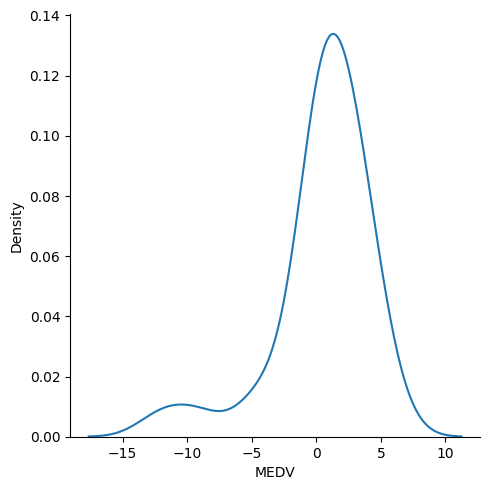

In [24]:
sns.displot(reg_predict - y_test, kind='kde')

In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(reg_predict, y_test)
score

0.799748656844836

# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
ridge_regressor = Ridge()

In [30]:
parameters = {
    'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]
}

ridge_cv = GridSearchCV(
    ridge_regressor,
    parameters,
    scoring='neg_mean_squared_error',
    cv=5
)

ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [31]:
ridge_cv.best_params_

{'alpha': 10}

In [32]:
ridge_cv.best_score_

-25.37216715751891

In [33]:
ridge_pred = ridge_cv.predict(X_test)

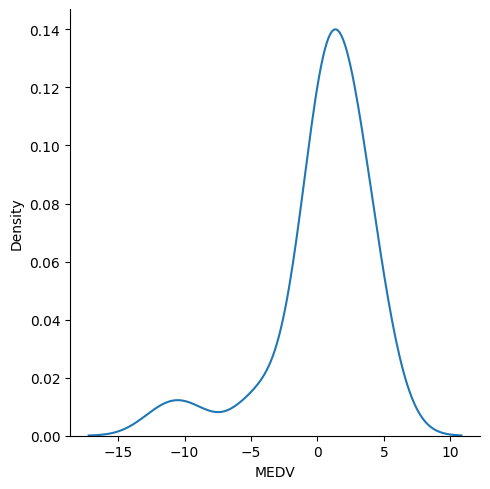

In [34]:
sns.displot(ridge_pred-y_test, kind='kde')

In [35]:
ridge_score = r2_score(ridge_pred, y_test)
ridge_score

0.7969159305701868

# Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso_regressor = Lasso()

In [38]:
parameters = {
    'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]
}

lasso_cv = GridSearchCV(
    lasso_regressor,
    parameters,
    scoring='neg_mean_squared_error',
    cv=5
)

lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [39]:
lasso_cv.best_params_, lasso_cv.best_score_

({'alpha': 1}, -31.117487951674605)

In [40]:
lasso_pred = lasso_cv.predict(X_test)

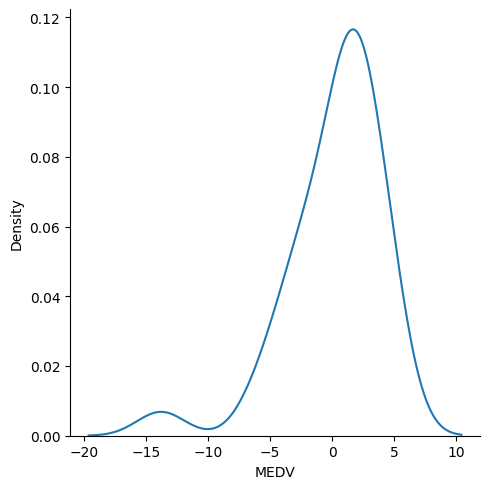

In [41]:
sns.displot(lasso_pred-y_test, kind='kde')

In [42]:
lasso_score = r2_score(lasso_pred, y_test)
lasso_score

0.6137006761547497

# Logistic Regression

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [47]:
df = df[df['species'] != 'setosa']

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [49]:
df.shape

(100, 5)

In [50]:
df['species'] = df['species'].map({ 'versicolor': 0, 'virginica': 1 })

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [52]:
# Split dataset into independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [53]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [54]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [55]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
65,6.7,3.1,4.4,1.4
90,5.5,2.6,4.4,1.2
146,6.3,2.5,5.0,1.9
59,5.2,2.7,3.9,1.4
122,7.7,2.8,6.7,2.0
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


In [56]:
# Grid Search CV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
    'max_iter': [100, 200, 300]
}

classifier_cv = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=5
)

In [58]:
classifier_cv.fit(X_train, y_train)

d:\Data Science\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [59]:
classifier_cv.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [60]:
classifier_cv.best_score_

0.9733333333333334

In [61]:
# prediction

y_pred = classifier_cv.predict(X_test)

In [62]:
# accuracy score
from sklearn.metrics import accuracy_score, classification_report

In [63]:
score = accuracy_score(y_pred, y_test)
score

0.92

In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



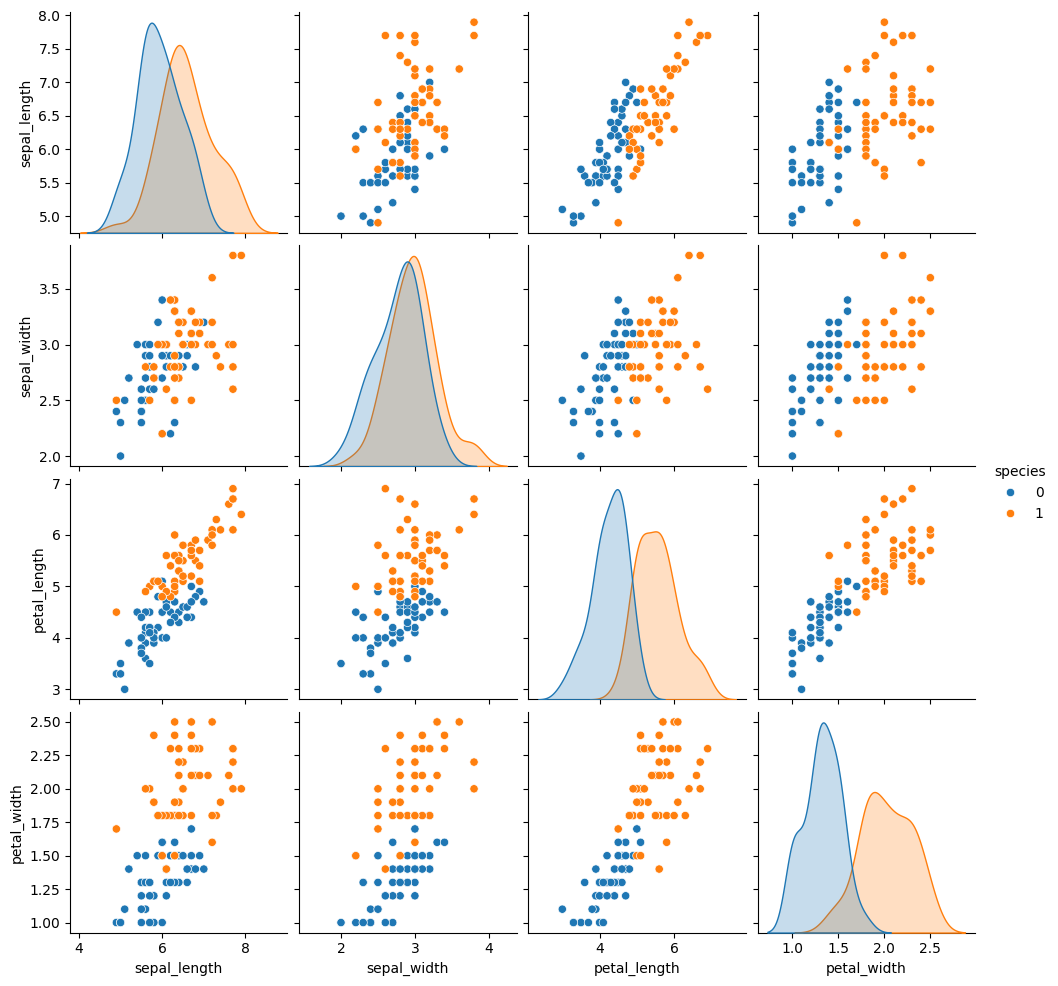

In [65]:
## EDA
sns.pairplot(df, hue='species')

In [66]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


# Decision Tree Algorithm

## Post Prunning

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from sklearn.datasets import load_iris

In [69]:
iris = load_iris()

In [70]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [71]:
import seaborn as sns

In [72]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
# Independent and dependent features

X = df.iloc[:, :-1]
y = iris.target

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [75]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Post Prunning
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

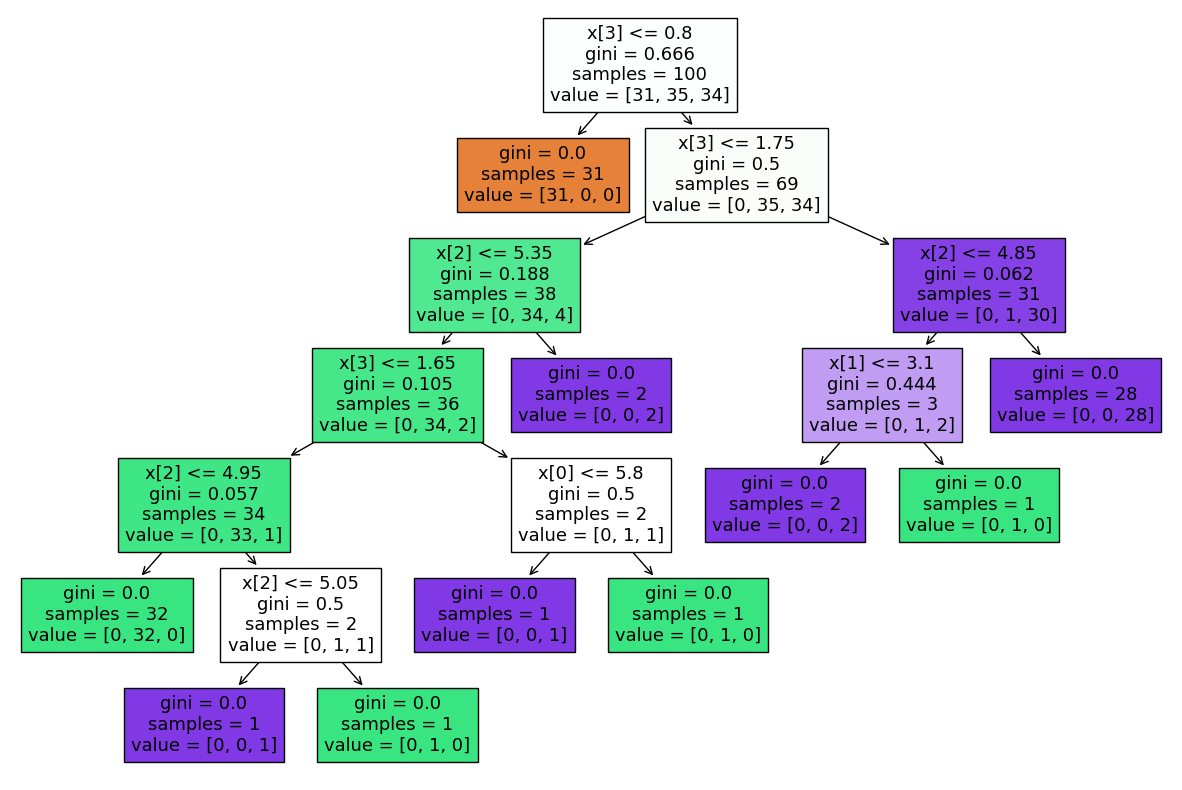

In [77]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled=True)
# Binary Classification --> CART

In [78]:
# Prdiction

y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [79]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred, y_test)
score

0.98

In [80]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [81]:
# Hyperparameter Tunning
dtree = DecisionTreeClassifier(max_depth=2)

In [82]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

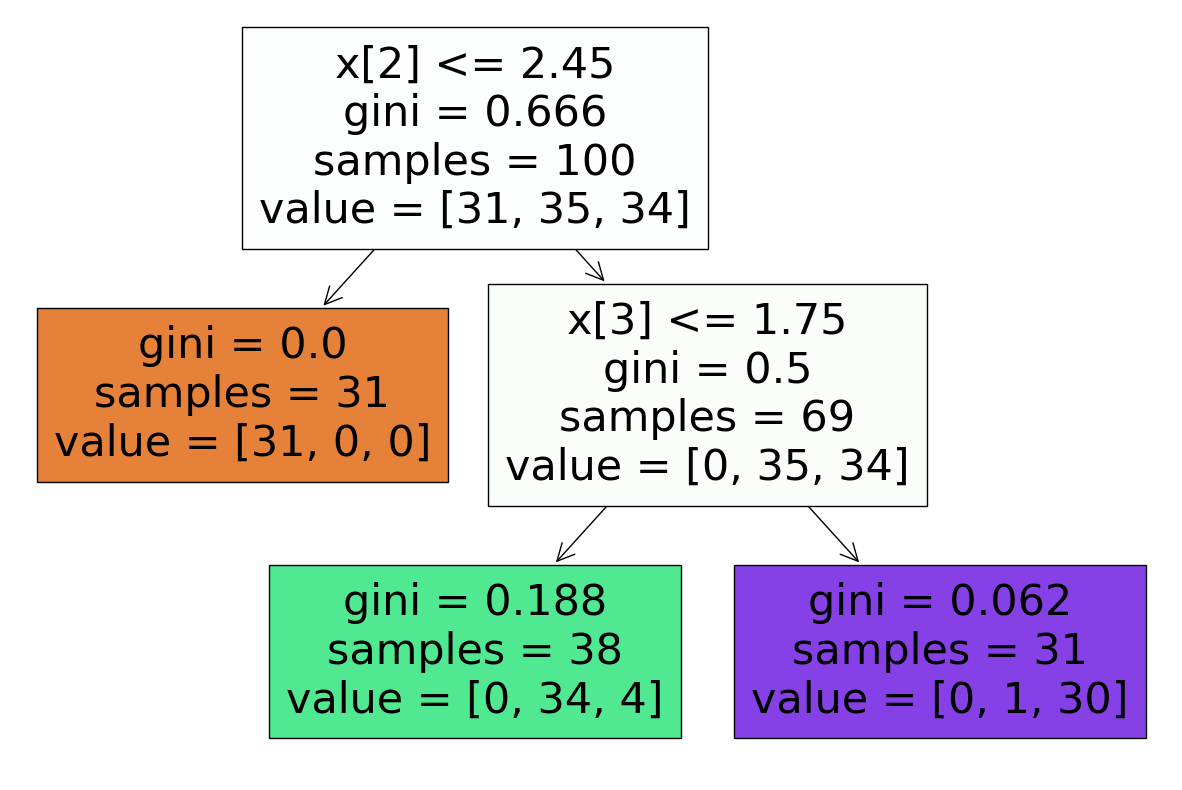

In [83]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled=True)
# Binary Classification --> CART

In [84]:
# Prdiction

y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [85]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred, y_test)

In [86]:
score

0.98

In [87]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Pre Prunning

In [88]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
dtree = DecisionTreeClassifier()
cv = GridSearchCV(
    estimator=dtree,
    param_grid=parameters,
    cv=5,
    scoring='accuracy'
)

In [91]:
cv.fit(X_train, y_train)

d:\Data Science\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Data Science\ML\venv\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [92]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [93]:
y_pred = cv.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report

In [95]:
score = accuracy_score(y_pred, y_test)

In [96]:
score

0.98

In [97]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Cross Validation

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
boston_df = pd.read_csv("./Data/HousingData.csv")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [100]:
X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]

In [104]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [103]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [106]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor()

In [107]:
dtree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [108]:
y_pred = dtree_regressor.predict(X_test)

In [109]:
from sklearn.metrics import r2_score

score = r2_score(y_pred, y_test)
score

0.7360103710962383

In [110]:
# Hyper Parameter Tunning
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}

dtree_regressor = DecisionTreeRegressor()

In [148]:
from sklearn.model_selection import GridSearchCV

cv_regressor = GridSearchCV(
    estimator=dtree_regressor,
    param_grid=parameters,
    cv=10,
    scoring='neg_mean_squared_error'
)

In [149]:
cv_regressor.fit(X_train, y_train)

d:\Data Science\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1980 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
880 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\Data Science\ML\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Data Science\ML\venv\Lib\site-packages\

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [150]:
cv_regressor.best_params_

'''
    {
        'criterion': 'squared_error',
        'max_depth': 11,
        'max_features': 'log2',
        'splitter': 'best'
    }
'''

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [151]:
y_pred = cv_regressor.predict(X_test)

In [152]:
r2_score(y_pred, y_test)

0.7022745602009701